In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import OrthogonalMatchingPursuit, OrthogonalMatchingPursuitCV
from sklearn.ensemble import VotingRegressor, BaggingRegressor
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from matplotlib.ticker import MaxNLocator
import warnings
warnings.filterwarnings('ignore')

# Deformation

In [2]:
path = 'object1/deformation/'
print(os.listdir(path))
x1_train = pd.read_csv(path+'a1_x1_d_train.csv')
x2_train = pd.read_csv(path+'a1_x2_d_train.csv')
f1_train = pd.read_csv(path+'a1_f_d_train.csv')
f1_test = pd.read_csv(path+'a1_f_d_test.csv')
x1_test = pd.read_csv(path+'a1_x1_d_test.csv')
x2_test = pd.read_csv(path+'a1_x2_d_test.csv')
print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
X_train = np.concatenate((x1_train,x2_train),axis=1)
X_test = np.concatenate((x1_test,x2_test),axis=1)
X_train.shape

['a1_x2_d_test.csv', 'a1_f_d_test.csv', 'a1_x2_d_train.csv', 'a1_f_d_train.csv', 'a1_x1_d_test.csv', 'a1_x1_d_train.csv']
116447 58223 116447 58223


(116447, 2)

In [3]:
def data(x,y,step=10):
    x_train,y_train = [],[]
    for i in range(4,len(y),step):
        x_i = [0]*10
        for j in range(5):
            x_i[j]=x[i-j,0]
            x_i[j+5]=x[i-j,1]
        x_train.append(x_i)
        y_train.append(y[i])
    return np.array(x_train),np.array(y_train)


In [4]:
Y_train,y_test = np.array(f1_train),np.array(f1_test)
x_train,y_train = data(X_train,Y_train)
x_test,y_test = data(X_test,y_test,1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(11645, 10) (11645, 1) (58219, 10) (58219, 1)


In [5]:
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

re_rf = []
error_rf = []
for i in range(len(y_test)):
    re_rf.append(abs(y1_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_rf.append(y1_pred[i]-y_test[i,0])

Time taken by Random Forest 0:00:12.635940
Root Mean Squared error of Random Forest 0.062000835696961215


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

In [7]:
print('Time taken by CATBOOST Model: ',t2-t1)
y2_pred = cat.predict(x_test)
print('Root mean square error of CATBOOST Model: ',sqrt(mean_squared_error(y_test,y2_pred)))
    
re_cat = []
error_cat = []
for i in range(len(y_test)):
    re_cat.append(abs(y2_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_cat.append(y2_pred[i]-y_test[i,0])

Time taken by CATBOOST Model:  0:00:04.327904
Root mean square error of CATBOOST Model:  0.05621138682662372


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


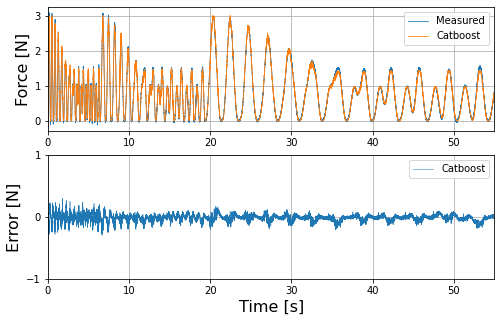

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_figheight(5)
fig.set_figwidth(8)

ax1.plot(np.arange(0,55,0.001),y_test[:55000],label = 'Measured',linewidth=0.8)
ax1.plot(np.arange(0,55,0.001),y2_pred[:55000],label = 'Catboost',linewidth=0.8)
ax1.legend(loc = 'upper right')
ax1.set_xlim([0, 55])
ax1.set_ylabel('Force [N]',fontsize=16)
#ax1.set_xlabel('Time [s]',fontsize=15)
ax1.grid()

ax2.plot(np.arange(0,55,0.001),error_cat[:55000],label = 'Catboost' ,linewidth=0.5)
ax2.legend(loc = 'upper right')
ax2.set_xlim([0, 55])
ax2.set_ylim([-1, 1])
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))
ax2.set_ylabel('Error [N]',fontsize=16)
ax2.set_xlabel('Time [s]',fontsize=16)
ax2.grid()
# plt.savefig('obj1_def_3.eps')
# plt.savefig('obj1_def_3.pdf')
plt.show()

# Indentation

In [10]:
path = 'object1/indentation/'
print(os.listdir(path))
x1_train = pd.read_csv(path+'a1_x1_indent_train.csv')
x2_train = pd.read_csv(path+'a1_x2_indent_train.csv')
f1_train = pd.read_csv(path+'a1_f_indent_train.csv')
f1_test = pd.read_csv(path+'a1_f_indent_test.csv')
x1_test = pd.read_csv(path+'a1_x1_indent_test.csv')
x2_test = pd.read_csv(path+'a1_x2_indent_test.csv')
print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
X_train = np.concatenate((x1_train,x2_train),axis=1)
X_test = np.concatenate((x1_test,x2_test),axis=1)
X_train.shape

['a1_f_indent_test.csv', 'a1_x1_indent_train.csv', 'a1_x2_indent_train.csv', 'a1_x2_indent_test.csv', 'a1_x1_indent_test.csv', 'a1_f_indent_train.csv']
135869 38801 135869 38801


(135869, 2)

In [11]:
Y_train,y_test = np.array(f1_train),np.array(f1_test)
x_train,y_train = data(X_train,Y_train)
x_test,y_test = data(X_test,y_test,1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(13587, 10) (13587, 1) (38797, 10) (38797, 1)


In [12]:
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

re_rf = []
error_rf = []
for i in range(len(y_test)):
    re_rf.append(abs(y1_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_rf.append(y1_pred[i]-y_test[i,0])

Time taken by Random Forest 0:00:13.764915
Root Mean Squared error of Random Forest 0.05998454834339665


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

In [14]:
print('Time taken by CATBOOST Model: ',t2-t1)
y2_pred = cat.predict(x_test)
print('Root mean square error of CATBOOST Model: ',sqrt(mean_squared_error(y_test,y2_pred)))
    
re_cat = []
error_cat = []
for i in range(len(y_test)):
    re_cat.append(abs(y2_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_cat.append(y2_pred[i]-y_test[i,0])

Time taken by CATBOOST Model:  0:00:05.474328
Root mean square error of CATBOOST Model:  0.06612649023517576


# Phase

In [17]:
path = 'object1/phase/'
print(os.listdir(path))
x1_train = pd.read_csv(path+'a1_x1_phase_train.csv')
x2_train = pd.read_csv(path+'a1_x2_phase_train.csv')
f1_train = pd.read_csv(path+'a1_f_phase_train.csv')
f1_test = pd.read_csv(path+'a1_f_phase_test.csv')
x1_test = pd.read_csv(path+'a1_x1_phase_test.csv')
x2_test = pd.read_csv(path+'a1_x2_phase_test.csv')
print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
X_train = np.concatenate((x1_train,x2_train),axis=1)
X_test = np.concatenate((x1_test,x2_test),axis=1)
X_train.shape

['a1_f_phase_test.csv', 'a1_x2_phase_test.csv', 'a1_x2_phase_train.csv', 'a1_f_phase_train.csv', 'a1_x1_phase_test.csv', 'a1_x1_phase_train.csv']
94064 80606 94064 80606


(94064, 2)

In [19]:
Y_train,y_test = np.array(f1_train),np.array(f1_test)
x_train,y_train = data(X_train,Y_train)
x_test,y_test = data(X_test,y_test,1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(9406, 10) (9406, 1) (80602, 10) (80602, 1)


In [20]:
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

re_rf = []
error_rf = []
for i in range(len(y_test)):
    re_rf.append(abs(y1_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_rf.append(y1_pred[i]-y_test[i,0])

Time taken by Random Forest 0:00:09.043578
Root Mean Squared error of Random Forest 0.10823281535421216


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

In [22]:
print('Time taken by CATBOOST Model: ',t2-t1)
y2_pred = cat.predict(x_test)
print('Root mean square error of CATBOOST Model: ',sqrt(mean_squared_error(y_test,y2_pred)))
    
re_cat = []
error_cat = []
for i in range(len(y_test)):
    re_cat.append(abs(y2_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_cat.append(y2_pred[i]-y_test[i,0])

Time taken by CATBOOST Model:  0:00:04.436435
Root mean square error of CATBOOST Model:  0.06753650655925658


# Mixed

In [24]:
path = 'object1/mixed/'
print(os.listdir(path))
x1_train = pd.read_csv(path+'a1_x1_mixed_train.csv')
x2_train = pd.read_csv(path+'a1_x2_mixed_train.csv')
f1_train = pd.read_csv(path+'a1_f_mixed_train.csv')
f1_test = pd.read_csv(path+'a1_f_mixed_test.csv')
x1_test = pd.read_csv(path+'a1_x1_mixed_test.csv')
x2_test = pd.read_csv(path+'a1_x2_mixed_test.csv')
print(len(x1_train),len(x1_test),len(f1_train),len(f1_test))
X_train = np.concatenate((x1_train,x2_train),axis=1)
X_test = np.concatenate((x1_test,x2_test),axis=1)
X_train.shape

['a1_f_mixed_test.csv', 'a1_x1_mixed_train.csv', 'a1_f_mixed_train.csv', 'a1_x2_mixed_train.csv', 'a1_x1_mixed_test.csv', 'a1_x2_mixed_test.csv']
48777 125893 48777 125893


(48777, 2)

In [25]:
Y_train,y_test = np.array(f1_train),np.array(f1_test)
x_train,y_train = data(X_train,Y_train)
x_test,y_test = data(X_test,y_test,1)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(4878, 10) (4878, 1) (125889, 10) (125889, 1)


In [26]:
t1 = datetime.now()
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
t2 = datetime.now()
print('Time taken by Random Forest',t2-t1)
    
y1_pred = rf.predict(x_test)
print('Root Mean Squared error of Random Forest',sqrt(mean_squared_error(y_test,y1_pred)))

re_rf = []
error_rf = []
for i in range(len(y_test)):
    re_rf.append(abs(y1_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_rf.append(y1_pred[i]-y_test[i,0])

Time taken by Random Forest 0:00:04.119851
Root Mean Squared error of Random Forest 0.09471633853964762


In [ ]:
cat = CatBoostRegressor()
t1 = datetime.now()
cat.fit(x_train,y_train)
t2 = datetime.now()

In [28]:
print('Time taken by CATBOOST Model: ',t2-t1)
y2_pred = cat.predict(x_test)
print('Root mean square error of CATBOOST Model: ',sqrt(mean_squared_error(y_test,y2_pred)))
    
re_cat = []
error_cat = []
for i in range(len(y_test)):
    re_cat.append(abs(y2_pred[i]-y_test[i,0])/(0.1+ abs(y_test[i,0])))
    error_cat.append(y2_pred[i]-y_test[i,0])

Time taken by CATBOOST Model:  0:00:02.682328
Root mean square error of CATBOOST Model:  0.07125697442485818
